<a href="https://colab.research.google.com/github/PSivaMallikarjun/Military-Aircraft-Satellite-Imagery-Classification-using-Deep-Learning-Custom-Datasets-/blob/main/Military_Aircraft_(Satellite)_Imagery_Classification_using_Deep_Learning_(Custom_Datasets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Military Aircraft (Satellite) Imagery Classification using Deep Learning (Custom Datasets)**

In this project, we will classify military aircraft images obtained from satellites (F-22 Raptor, Boeing B-52, A-10 Thunderbolt, .. etc.) using Deep Learning algorithms.

In this project you will learn to create your own dataset and you will learn to use these customized datasets on pre-trained models.

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 163s 11s/step - accuracy: 0.1876 - loss: 1.7228 - val_accuracy: 0.2300 - val_loss: 1.6124
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 124s 10s/step - accuracy: 0.1745 - loss: 1.6276 - val_accuracy: 0.2700 - val_loss: 1.6109
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - accuracy: 0.1904 - loss: 1.6198 - val_accuracy: 0.2000 - val_loss: 1.6131
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 123s 10s/step - accuracy: 0.2283 - loss: 1.6423 - val_accuracy: 0.2700 - val_loss: 1.6218
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 124s 10s/step - accuracy: 0.1888 - loss: 1.6273 - val_accuracy: 0.2200 - val_loss: 1.6207
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 138s 11s/step - accuracy: 0.1674 - loss: 1.6357 - val_accuracy: 0.2100 - val_loss: 1.6209
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 121s 9s/step - accuracy: 0.1686 - loss: 1.6380 - val_accuracy: 0.1700 - val_loss: 1.6358
Epoch 8/10
13/13 ━━━━━━

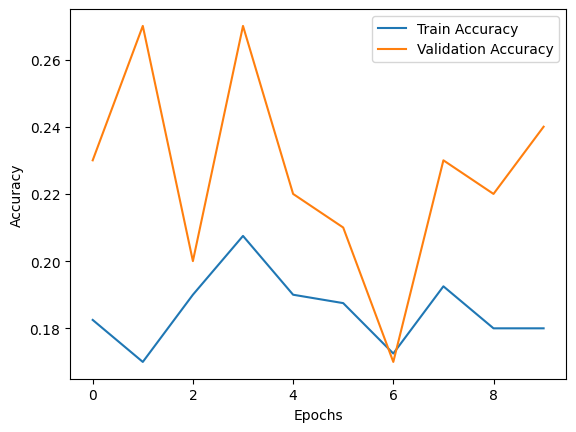

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define dataset path
dataset_path = '/content/military_aircraft_dataset'

# List of military aircraft classes
aircraft_classes = ['F-22_Raptor', 'Boeing_B-52', 'A-10_Thunderbolt', 'F-35_Lightning', 'F-16_Fighting_Falcon']

# Generate synthetic dataset if it doesn't exist
def generate_synthetic_dataset(path, classes, num_images=100):
    os.makedirs(path, exist_ok=True)
    for class_name in classes:
        class_dir = os.path.join(path, class_name)
        os.makedirs(class_dir, exist_ok=True)
        for img_id in range(num_images):
            # Generate a random image (simulate satellite imagery)
            img = Image.fromarray(np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8))
            img.save(os.path.join(class_dir, f'img_{img_id}.png'))

# Create dataset
generate_synthetic_dataset(dataset_path, aircraft_classes)

# Load pre-trained InceptionResNetV2 model without top layers
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(aircraft_classes), activation='softmax')(x)  # Number of aircraft classes

# Create new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, verbose=1)

# Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('military_aircraft_classifier.h5')
